# Aprendizaje automático para la predicción de la resistencia del hormigón 
Machine Learning Regression Overview for Concrete Strength Prediction

```
Autor       : Francisco Jimenez Mucho
Linkedin    : https://www.linkedin.com/in/fjmucho/
date        : Julio 2023, uppdate julio 2024
```

## Concrete Compressive Strength (📊 data)

Este cuaderno se demuestra la aplicación de modelos de Machine Learning para la predicción de la resistencia a la compresión de mezclas de concreto.

**Objetivo**
1. Estructurar los datos y Entrenar con algoritmos `Regresion Lineal Multiple (RLM)` de ML desde cero con `sklearn`.
2. Comprender a detalle los algoritmos `Regresion Lineal Multiple` y como entrenar hasta encontrar su convergencia optima, Evaluación de costos, evaluación de gradiente, selección de tasa de aprendizaje, escalamiento de características.
3. Comprender los diferentes usos en tareas cientificas con algoritmos `Regresion Lineal Multiple` y adoptar para otras.
4. Guardar el modelo ML entrenado y usarlo para predicciones futuras.

### <img alt="pagakes" src="https://pypi.org/static/images/white-cube.2351a86c.svg" width="1.1%"/> Importacion de Librerias, clases, funciones, constantes, etc.

In [642]:
# !pip install xgboost sklearn joblib mlxtend numpy pandas scipy seaborn matplotlib -q

In [643]:
import numpy as np
import scipy as sp

import pandas as pd

# pd.set_option('display.max_rows',100000)
# pd.set_option('display.max_columns',1000)

In [644]:
from func import utils

In [645]:
import seaborn as sns
from matplotlib import pyplot as plt

In [646]:
#  Configuracion de graficos
plt.style.use('bmh') # seaborn-v0.8, ggplot
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10
# sns.set_palette('husl') # deep, titanic

In [647]:
import warnings
warnings.filterwarnings('ignore',category = DeprecationWarning)
warnings.filterwarnings('ignore',category = UserWarning)
warnings.filterwarnings('ignore',category = RuntimeWarning)
warnings.filterwarnings('ignore',category = FutureWarning)

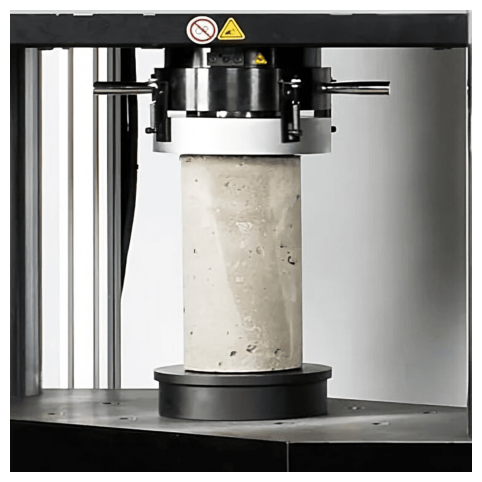

In [648]:
import matplotlib.image as mpimg

# Cargar imagen desde archivo (puede ser png, jpg, etc.)
img = mpimg.imread('images\\Ensayo-de-Resistencia-a-la-compresion-Probetas-6-x-12-in.png')
# Mostrar imagen
plt.imshow(img)

plt.axis('off')
# plt.xlim(100, 700)
# plt.ylim(50, 790)
plt.show()

### DataBase.

#### **e01a1.** Data tomadas de UCI - <img alt="pagakes" src=".\\images\\icon2.load-data.svg" width="1.37%"/> Carga de la data

**Definicion del problema**

*Data Set: UCI Concrete Comprenssive Stregth*, Data: https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength

Base de datos que contiene $1030$ muestras de mescla de concreto.

Variables de Entrada (Features) y Variable Objetivo (Target):.

|Name | Nombre| unit-unidad|
|---|---|---|
Cement |Cemento: Material cementicio principal|kg/m³  (kg in a m^3 mixture)
Blast Furnace Slag | Escoria: Subproducto siderúrgico, mejora durabilidad|kg/m³ (kg in a m^3 mixture)
Fly Ash |Cenizas: Subproducto de plantas térmicas, reduce permeabilidad|kg/m³ (kg in a m^3 mixture)
Water | Agua: Necesaria para hidratación del cemento|kg/m³ (kg in a m^3 mixture)
Superplasticizer | Superplastificante: Aditivo que mejora trabajabilidad|kg/m³ (kg in a m^3 mixture)
Coarse Aggregate | Agregado Grueso: Grava, piedra triturada| kg/m³ (kg in a m^3 mixture)
Fine Aggregate | Agregado Fino: Arena | kg/m³ (kg in a m^3 mixture)
Age | Edad: Tiempo de curado desde el vaciado| (días)
Concrete compressive strength | **Resistencia a compresion: Capacidad del concreto para resistir carga**|(MPa, megapascals)

- paper: https://doi.org/10.1016/S0008-8846(98)00165-3,  
- paiper: https://doi.org/10.22115/SCCE.2021.286525.1320, link: https://www.jsoftcivil.com/article_133408_6dcee9cb0bb0e25be34fdf465dd906f1.pdf


In [649]:
concrete_data1 = pd.read_csv('data/Concrete_Data.csv', sep=';')
# display( concrete_data1.head(5) )

concrete_data1 = concrete_data1.rename(columns={
    'Cement (component 1)(kg in a m^3 mixture)'             : 'cemento',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)' : 'escoria',
    'Fly Ash (component 3)(kg in a m^3 mixture)'            : 'cenizas',
    'Water  (component 4)(kg in a m^3 mixture)'             : 'agua',
    'Superplasticizer (component 5)(kg in a m^3 mixture)'   : 'superplastificante',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)'  : 'agregado_grueso',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)'     : 'agregado_fino',
    'Age (day)'                                             : 'edad',
    'Concrete compressive strength(MPa, megapascals) '      : 'resistencia_compresion_concreto',
    })

# new_columns = [ 'cemento', 'escoria', 'cenizas', 'agua', 'superplastificante', 'agregado_grueso', 'agregado_fino', 'edad', 'resistencia_compresion_concreto']
# concrete_data1.columns = new_columns

display( concrete_data1.head(3) )

,cemento,escoria,cenizas,agua,superplastificante,agregado_grueso,agregado_fino,edad,resistencia_compresion_concreto
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27


#### e01a2. Data tomadas del repositorio [hpconcrete](https://github.com/hoangnguyence/hpconcrete/) - <img alt="pagakes" src=".\\images\\icon2.load-data.svg" width="1.37%"/> Carga de la data

*Data Set: Concrete Comprenssive Stregth*, Data: https://github.com/hoangnguyence/hpconcrete/

Base de datos que contiene $1133$ muestras de mescla de concreto.

Variables de Entrada (Features) y Variable Objetivo (Target):.

|Name | Nombre| unit-unidad|
|---|---|---|
Cement |Cemento: Material cementicio principal|kg/m³  (kg in a m^3 mixture)
Blast Furnace Slag | Escoria: Subproducto siderúrgico, mejora durabilidad|kg/m³ (kg in a m^3 mixture)
Fly Ash |Cenizas: Subproducto de plantas térmicas, reduce permeabilidad|kg/m³ (kg in a m^3 mixture)
Water | Agua: Necesaria para hidratación del cemento|kg/m³ (kg in a m^3 mixture)
Superplasticizer | Superplastificante: Aditivo que mejora trabajabilidad|kg/m³ (kg in a m^3 mixture)
Coarse Aggregate | Agregado Grueso: Grava, piedra triturada| kg/m³ (kg in a m^3 mixture)
Fine Aggregate | Agregado Fino: Arena | kg/m³ (kg in a m^3 mixture)
Age | Edad: Tiempo de curado desde el vaciado| (días)
Concrete compressive strength | **Resistencia a compresion: Capacidad del concreto para resistir carga**|(MPa, megapascals)

paper: https://doi.org/10.1016/j.conbuildmat.2020.120950

In [650]:
concrete_data2 = pd.read_excel('https://github.com/hoangnguyence/hpconcrete/raw/c06df748156dc91aa50235c639f3c8f3c29dcf1d/data/hpc_compressive_strength.xlsx')
# display( concrete_data2.head(5) )

concrete_data2 = concrete_data2.rename(columns={
    'Cement (kg in a m^3 mixture)'                      : 'cemento',
    'Blast Furnace Slag (kg in a m^3 mixture)'          : 'escoria',
    'Fly Ash (kg in a m^3 mixture)'                     : 'cenizas',
    'Water (kg in a m^3 mixture)'                       : 'agua',
    'Superplasticizer (kg in a m^3 mixture)'            : 'superplastificante',
    'Coarse Aggregate (kg in a m^3 mixture)'            : 'agregado_grueso',
    'Fine Aggregate (kg in a m^3 mixture)'              : 'agregado_fino',
    'Age (day)'                                         : 'edad',
    'Concrete compressive strength (MPa, megapascals) ' : 'resistencia_compresion_concreto',
    })
display( concrete_data2.head(3) )

,cemento,escoria,cenizas,agua,superplastificante,agregado_grueso,agregado_fino,edad,resistencia_compresion_concreto
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535


#### **e01a3.** Data tomadas del repositorio [artículo](https://www.mdpi.com/2076-3417/12/1/361)-2022 - <img alt="pagakes" src=".\\images\\icon2.load-data.svg" width="1.37%"/> Carga de la data

*Data Set: Concrete Comprenssive Stregth*, Data: https://www.mdpi.com/2076-3417/12/1/361

Base de datos que contiene $1133$ muestras de mescla de concreto.

Variables de Entrada (Features) y Variable Objetivo (Target):.

|Name | Nombre| unit-unidad|
|---|---|---|
Cement |Cemento: Material cementicio principal|kg/m³  (kg in a m^3 mixture)
Blast Furnace Slag | Escoria: Subproducto siderúrgico, mejora durabilidad|kg/m³ (kg in a m^3 mixture)
Fly Ash |Cenizas: Subproducto de plantas térmicas, reduce permeabilidad|kg/m³ (kg in a m^3 mixture)
Water | Agua: Necesaria para hidratación del cemento|kg/m³ (kg in a m^3 mixture)
Superplasticizer | Superplastificante: Aditivo que mejora trabajabilidad|kg/m³ (kg in a m^3 mixture)
Coarse Aggregate | Agregado Grueso: Grava, piedra triturada| kg/m³ (kg in a m^3 mixture)
Fine Aggregate | Agregado Fino: Arena | kg/m³ (kg in a m^3 mixture)
Age | Edad: Tiempo de curado desde el vaciado| (días)
Concrete compressive strength | **Resistencia a compresion: Capacidad del concreto para resistir carga**|(MPa, megapascals)


In [651]:
concrete_data3 = pd.read_csv('data/Concrete_data_2022.csv', sep=',')
concrete_data3 = concrete_data3.drop(columns=['S.No'], axis=1)
concrete_data3.insert(loc=1, column='Blast Furnace Slag (kg in a m^3 mixture)', value=0)
# concrete_data3['Blast Furnace Slag (kg in a m^3 mixture)'] = 0

concrete_data3 = concrete_data3.rename(columns={
    ' Cement (kg/m3)'                            : 'cemento',
    'Blast Furnace Slag (kg in a m^3 mixture)'   : 'escoria',
    ' Fly Ash (kg/m3)'                           : 'cenizas',
    ' Water (kg/m3)'                             : 'agua',
    ' Superplasticizer (kg/m3)'                  : 'superplastificante',
    ' Coarse Aggregate (kg/m3)'                  : 'agregado_grueso',
    ' Fine Aggregate (kg/m3)'                    : 'agregado_fino',
    ' Age (Day)'                                 : 'edad',
    ' Compressive Strength (MPa)'                : 'resistencia_compresion_concreto',
    })
# concrete_data3.columns.tolist()
concrete_data3.head(3)


,cemento,escoria,cenizas,agua,superplastificante,agregado_grueso,agregado_fino,edad,resistencia_compresion_concreto
0,540.0,0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,475.0,0,0.0,228.0,0.0,932.0,594.0,28,39.29


#### **e01a4.** Data tomadas del [artículo]() - <img alt="pagakes" src=".\\images\\icon2.load-data.svg" width="1.37%"/> Carga de la data

In [652]:
concrete_data4 = pd.read_csv('data/Concrete_data_2023.csv', sep=',')
concrete_data4 = concrete_data4.drop(columns=['W/c ratio ', 'SiO2 ','CaO ','Fe2O3 ','Al2O3 ','Specific Gravity ','Replacement Percentage '], axis=1)
# display(concrete_data4.columns.tolist())

concrete_data4.insert(loc=1, column='Blast Furnace Slag (kg in a m^3 mixture)', value=0)
concrete_data4.insert(loc=2, column=' Fly Ash (kg/m3)', value=0)
concrete_data4.insert(loc=4, column=' Superplasticizer (kg/m3)', value=0)

concrete_data4 = concrete_data4.rename(columns={
    'Cement Content '                           : 'cemento',
    'Blast Furnace Slag (kg in a m^3 mixture)'  : 'escoria',
    ' Fly Ash (kg/m3)'                          : 'cenizas',
    'Water content '                            : 'agua',
    ' Superplasticizer (kg/m3)'                 : 'superplastificante',
    'Coarse Aggregate '                         : 'agregado_grueso',
    'Fine Aggregate '                           : 'agregado_fino',
    'Curing Days '                              : 'edad',
    'Compressive Strength'                      : 'resistencia_compresion_concreto',
    })
concrete_data4 = concrete_data4.loc[:,['cemento', 'escoria','cenizas','agua','superplastificante','agregado_grueso','agregado_fino','edad','resistencia_compresion_concreto']]

# remplazar valores vacios y string
concrete_data4 = concrete_data4.replace(['-'], 0) 
# Convertir columnas a numérico para asegurar NaN
for col in concrete_data4.columns:
    concrete_data4[col] = pd.to_numeric(concrete_data4[col], errors='coerce')
# Reemplazar los NaN por la media de cada columna
concrete_data4 = concrete_data4.fillna(concrete_data4.mean())

concrete_data4.head(3)


,cemento,escoria,cenizas,agua,superplastificante,agregado_grueso,agregado_fino,edad,resistencia_compresion_concreto
0,168.0,0,0,120.0,0,1052.0,701.0,1.0,7.7
1,385.0,0,0,154.0,0,1094.0,729.0,1.0,21.4
2,389.0,0,0,164.0,0,1093.0,729.0,1.0,30.5


#### **e01a5.** Data tomadas del [artículo]() - <img alt="pagakes" src=".\\images\\icon2.load-data.svg" width="1.37%"/> Carga de la data

In [653]:
concrete_data5 = pd.read_csv('data\\concrete_data applsci-10-07330-s001.csv', sep=',')
concrete_data5 = concrete_data5.drop(columns=['S.No'], axis=1)
# display(concrete_data5.columns.tolist())

concrete_data5.insert(loc=1, column='Blast Furnace Slag (kg in a m^3 mixture)', value=0)
concrete_data5.insert(loc=2, column='Fly Ash (kg/m3)', value=0)
concrete_data5.insert(loc=4, column='Age Days', value=0)

concrete_data5 = concrete_data5.rename(columns={
    'Cement'                                    : 'cemento',
    'Blast Furnace Slag (kg in a m^3 mixture)'  : 'escoria',
    'Fly Ash (kg/m3)'                           : 'cenizas',
    'Water'                                     : 'agua',
    'Superplasticizer'                          : 'superplastificante',
    'Coarse Aggregate'                         : 'agregado_grueso',
    'Fine Aggregate'                           : 'agregado_fino',
    'Age Days'                                  : 'edad',
    'Strength'                                  : 'resistencia_compresion_concreto',
    })
concrete_data5 = concrete_data5.loc[:,['cemento', 'escoria','cenizas','agua','superplastificante','agregado_grueso','agregado_fino','edad','resistencia_compresion_concreto']]
concrete_data5.head(3)
# display(concrete_data5.columns.tolist())

,cemento,escoria,cenizas,agua,superplastificante,agregado_grueso,agregado_fino,edad,resistencia_compresion_concreto
0,360.0,0,0,160.0,1.5,845.0,900.0,0,48.0
1,320.0,0,0,160.0,1.5,950.0,782.0,0,46.1
2,356.0,0,0,160.0,1.0,845.0,951.0,0,46.0


#### **e01e.** Data tomadas conbinados - <img alt="pagakes" src=".\\images\\icon2.load-data.svg" width="1.37%"/> Carga de la data

In [654]:
concrete_data6 = pd.concat([concrete_data1, concrete_data2], axis=0, ignore_index=True)
# concrete_data6 = pd.concat([concrete_data1, concrete_data2, concrete_data3, concrete_data4, concrete_data5], axis=0, ignore_index=True)
concrete_data6.head(3)

,cemento,escoria,cenizas,agua,superplastificante,agregado_grueso,agregado_fino,edad,resistencia_compresion_concreto
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27


#### e01f. Data generada o sintética - <img alt="pagakes" src=".\\images\\icon2.load-data.svg" width="1.37%"/> Carga de la data

### 1. Datos a usar | Use Data

In [655]:
concrete_data = concrete_data6

display(concrete_data.head(12))

,cemento,escoria,cenizas,agua,superplastificante,agregado_grueso,agregado_fino,edad,resistencia_compresion_concreto
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


### 🧮 2. Pre-Calculos y/o preparacion de datos (🖩-data)

In [656]:
data_keys = concrete_data.columns.tolist()
for name_col in data_keys:
    print(f"variables: {name_col}")

variables: cemento
variables: escoria
variables: cenizas
variables: agua
variables: superplastificante
variables: agregado_grueso
variables: agregado_fino
variables: edad
variables: resistencia_compresion_concreto


In [657]:
concrete_data.info() # se puede observar, el tipos de dato y datos nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2163 entries, 0 to 2162
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   cemento                          2163 non-null   float64
 1   escoria                          2163 non-null   float64
 2   cenizas                          2163 non-null   float64
 3   agua                             2163 non-null   float64
 4   superplastificante               2163 non-null   float64
 5   agregado_grueso                  2163 non-null   float64
 6   agregado_fino                    2163 non-null   float64
 7   edad                             2163 non-null   int64  
 8   resistencia_compresion_concreto  2163 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 152.2 KB


In [658]:
# print(f"tipos de datos:\n{concrete_data.dtypes}\n")

**Limpieza de datos**
1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al objetivos que querramos)
3. Registros (filas) repetidos
4. Valores extremos (outliers) solo en el caso de variables numericas. Se deben analizar en detalle ya que no necesariamente se debe de eliminar.
5. Errores tipograficos en el caso de variabes categoricas.

Al final se debe de tener un set de datos integro. Listo para la face de analisis exploratorio. link: https://codificandobits.com/tutorial/limpieza-de-datos-con-pandas/

In [659]:
concrete_data.dropna(inplace=True) # eliminar filas con datos nulos
print(f"Valores nulos por columna:\n{concrete_data.isnull().sum()}\n")

Valores nulos por columna:
cemento                            0
escoria                            0
cenizas                            0
agua                               0
superplastificante                 0
agregado_grueso                    0
agregado_fino                      0
edad                               0
resistencia_compresion_concreto    0
dtype: int64



In [660]:
# --- Columnas irrelevantes.
# en caso de variables categóricas, se pueden eliminar si no aportan al objetivo del modelo.

In [661]:
# --- Filas repetidas
print(f"Numero de filas antes de eliminar filas doplicadas: de {concrete_data.shape[0]} hay {concrete_data.duplicated().sum()} duplicadas")
concrete_data.drop_duplicates(inplace=True)
print(f"Numero de filas despues de eliminar filas doplicadas: quedan {concrete_data.shape[0]}\n")

Numero de filas antes de eliminar filas doplicadas: de 2163 hay 50 duplicadas
Numero de filas despues de eliminar filas doplicadas: quedan 2113



In [662]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2113 entries, 0 to 2162
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   cemento                          2113 non-null   float64
 1   escoria                          2113 non-null   float64
 2   cenizas                          2113 non-null   float64
 3   agua                             2113 non-null   float64
 4   superplastificante               2113 non-null   float64
 5   agregado_grueso                  2113 non-null   float64
 6   agregado_fino                    2113 non-null   float64
 7   edad                             2113 non-null   int64  
 8   resistencia_compresion_concreto  2113 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 165.1 KB


In [669]:
def plot_distribution_data(data):
    fig, axes = plt.subplots(
        nrows=3, 
        ncols=3, 
        figsize=(16, 12)
        )
    axes = axes.ravel()  # Flatten the axes array for easy iteration

    for i, column in enumerate(data.columns):
        # axes[i].hist(data[column], bins=30, edgecolor='black', color="skyblue", alpha=0.7)
        sns.histplot(data[column], kde=True, stat="count", bins=20, color='skyblue', edgecolor='black', ax=axes[i])
        # sns.kdeplot(data[column], color='red', ax=axes[i])
        axes[i].set_title(f'Distribución de {column}', fontsize=14, fontweight='bold')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frecuencia')
        # Agregamos estadisticas basicas
        mean_value = data[column].mean()
        median_value = data[column].median()
        axes[i].axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
        axes[i].axvline(median_value, color='blue', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
        axes[i].legend(fontsize=8)
        axes[i].grid(True)
    plt.tight_layout()
    plt.show()

def plot_boxplot_data(data):
    fig, axes = plt.subplots(
        nrows=3, 
        ncols=3, 
        figsize=(16, 12)
        )
    axes = axes.ravel()  # Flatten the axes array for easy iteration

    for i, column in enumerate(data.columns):
        box_data = axes[i].boxplot(data[column], vert=True, patch_artist=True, 
                                       boxprops=dict(facecolor='lightblue', color='black'),
                                       medianprops=dict(color='red'),
                                       whiskerprops=dict(color='black'),
                                       capprops=dict(color='black'),
                                       flierprops=dict(markerfacecolor='red', marker='o'))
        # sns.boxplot(x=data[column], ax=axes[i])
        axes[i].set_title(f'Boxplot de {column}', fontsize=14, fontweight='bold')
        axes[i].set_xlabel(column)
        axes[i].grid(True, alpha=0.7)

        # Calcular y mostrar informacion de outliers
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q1 + 1.5 * IQR

        outliers = data[column][(data[column] < lower_bound) | (data[column] > upper_bound)]
        
        if not outliers.empty or len(outliers) > 0:
            axes[i].text(0.05, 0.95, f'Outliers: {len(outliers)}', transform=axes[i].transAxes,
                         fontsize=12, verticalalignment='top', 
                         bbox=dict(facecolor='green', alpha=0.5))

    plt.tight_layout()
    plt.show()

def remove_outliers_iqr(data):
    df_clean = data.copy()
    for column in df_clean.columns:
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filtrar filas que cumplan la condición para esta columna
        df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]
    
    return df_clean

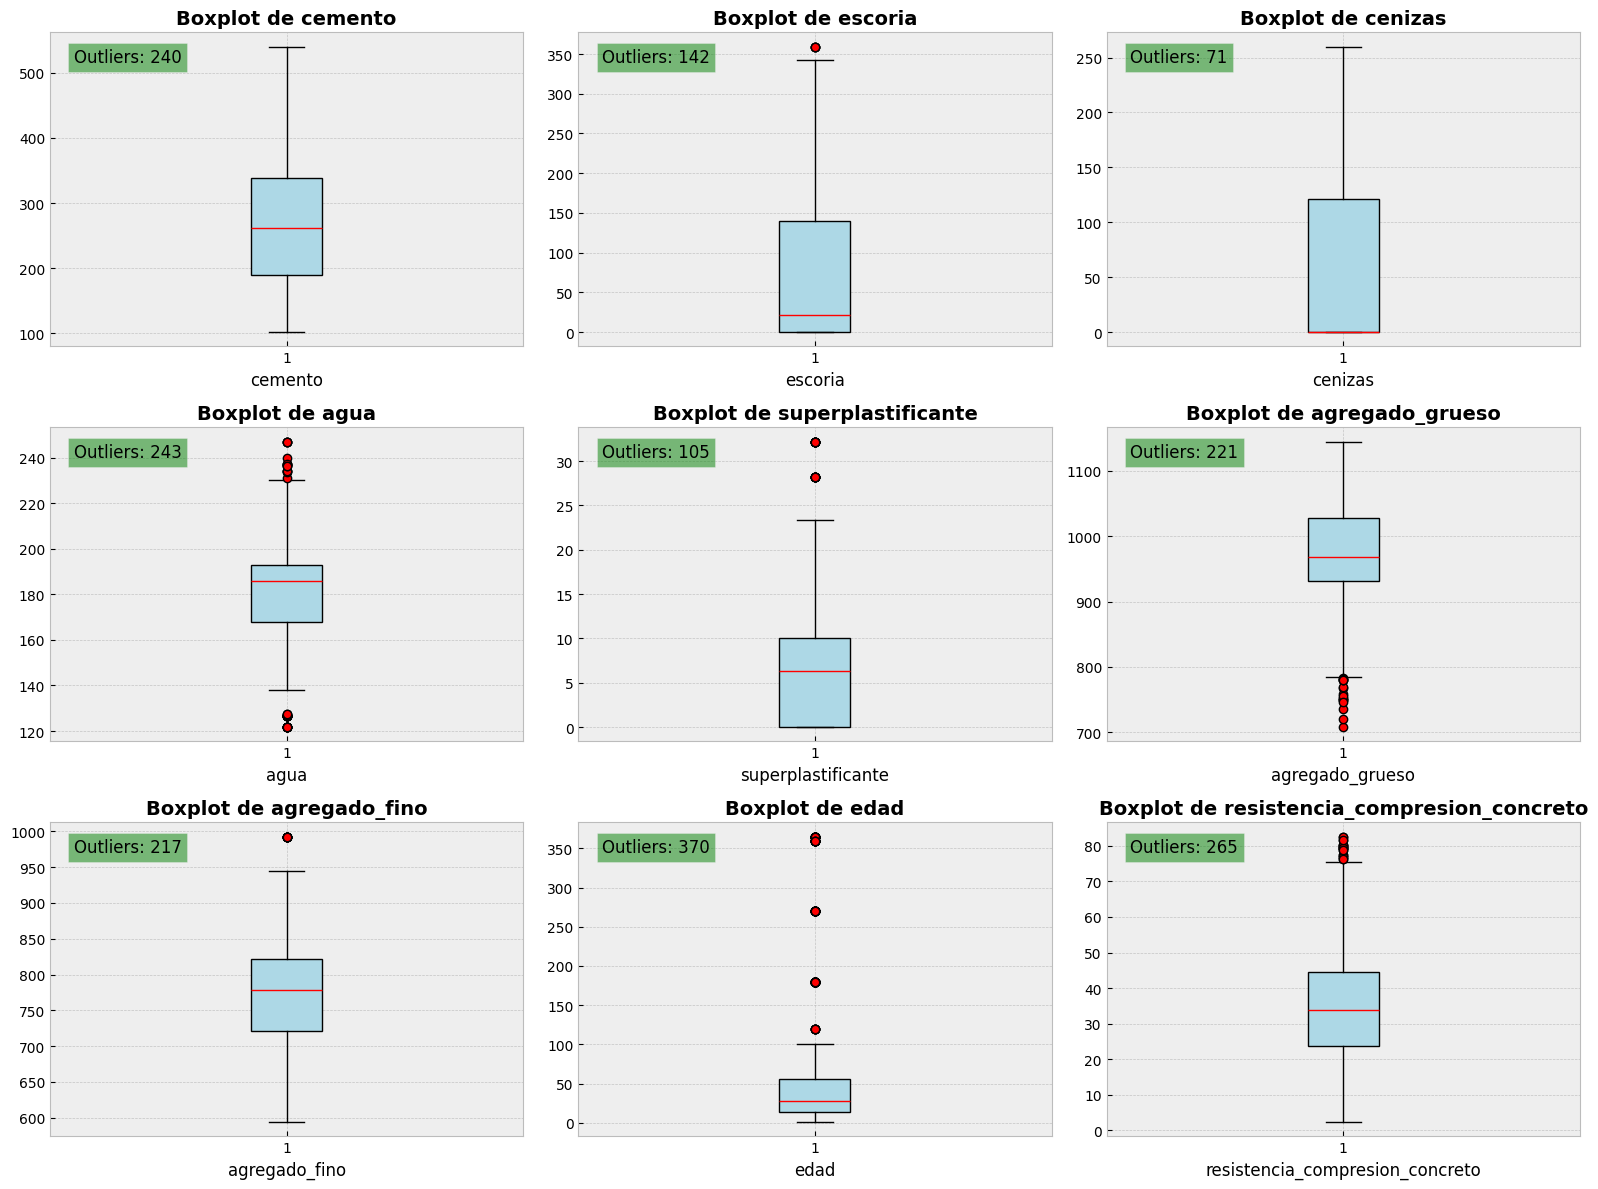

In [664]:
plot_boxplot_data(concrete_data)

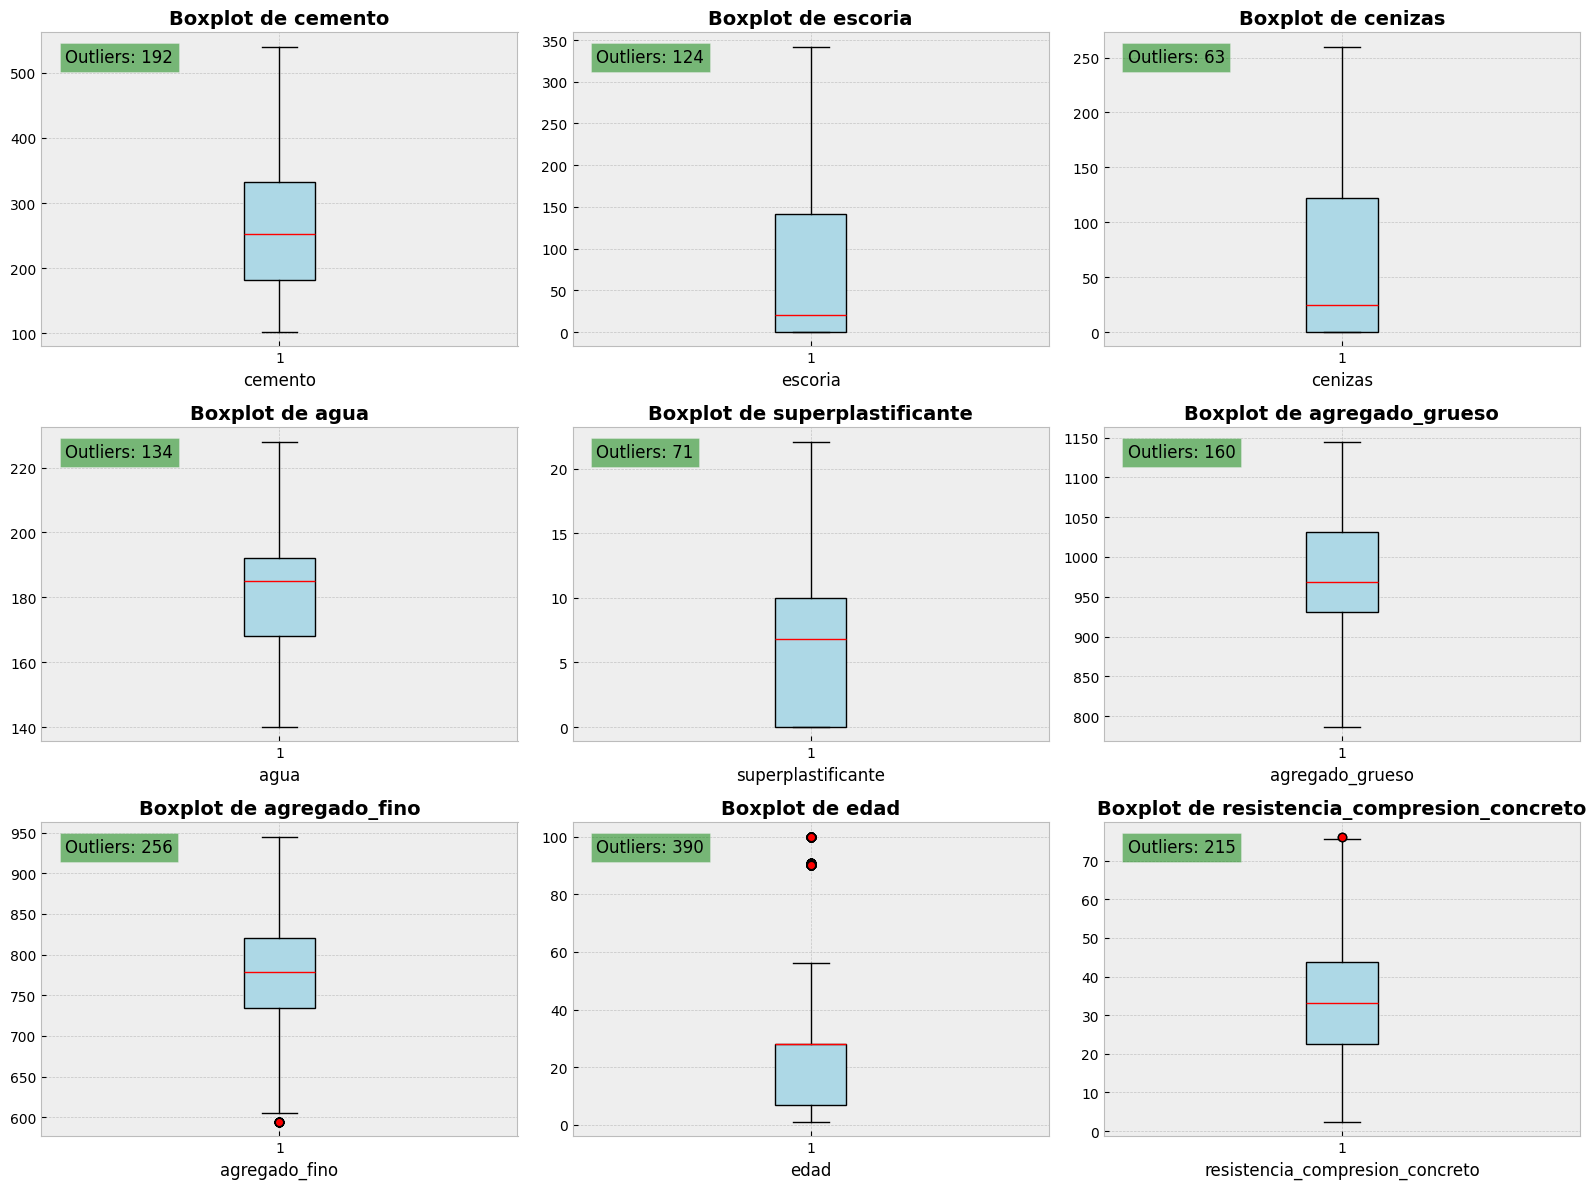

In [667]:
# Eliminar los outliers.
concrete_data = remove_outliers_iqr(concrete_data)
plot_boxplot_data(concrete_data)

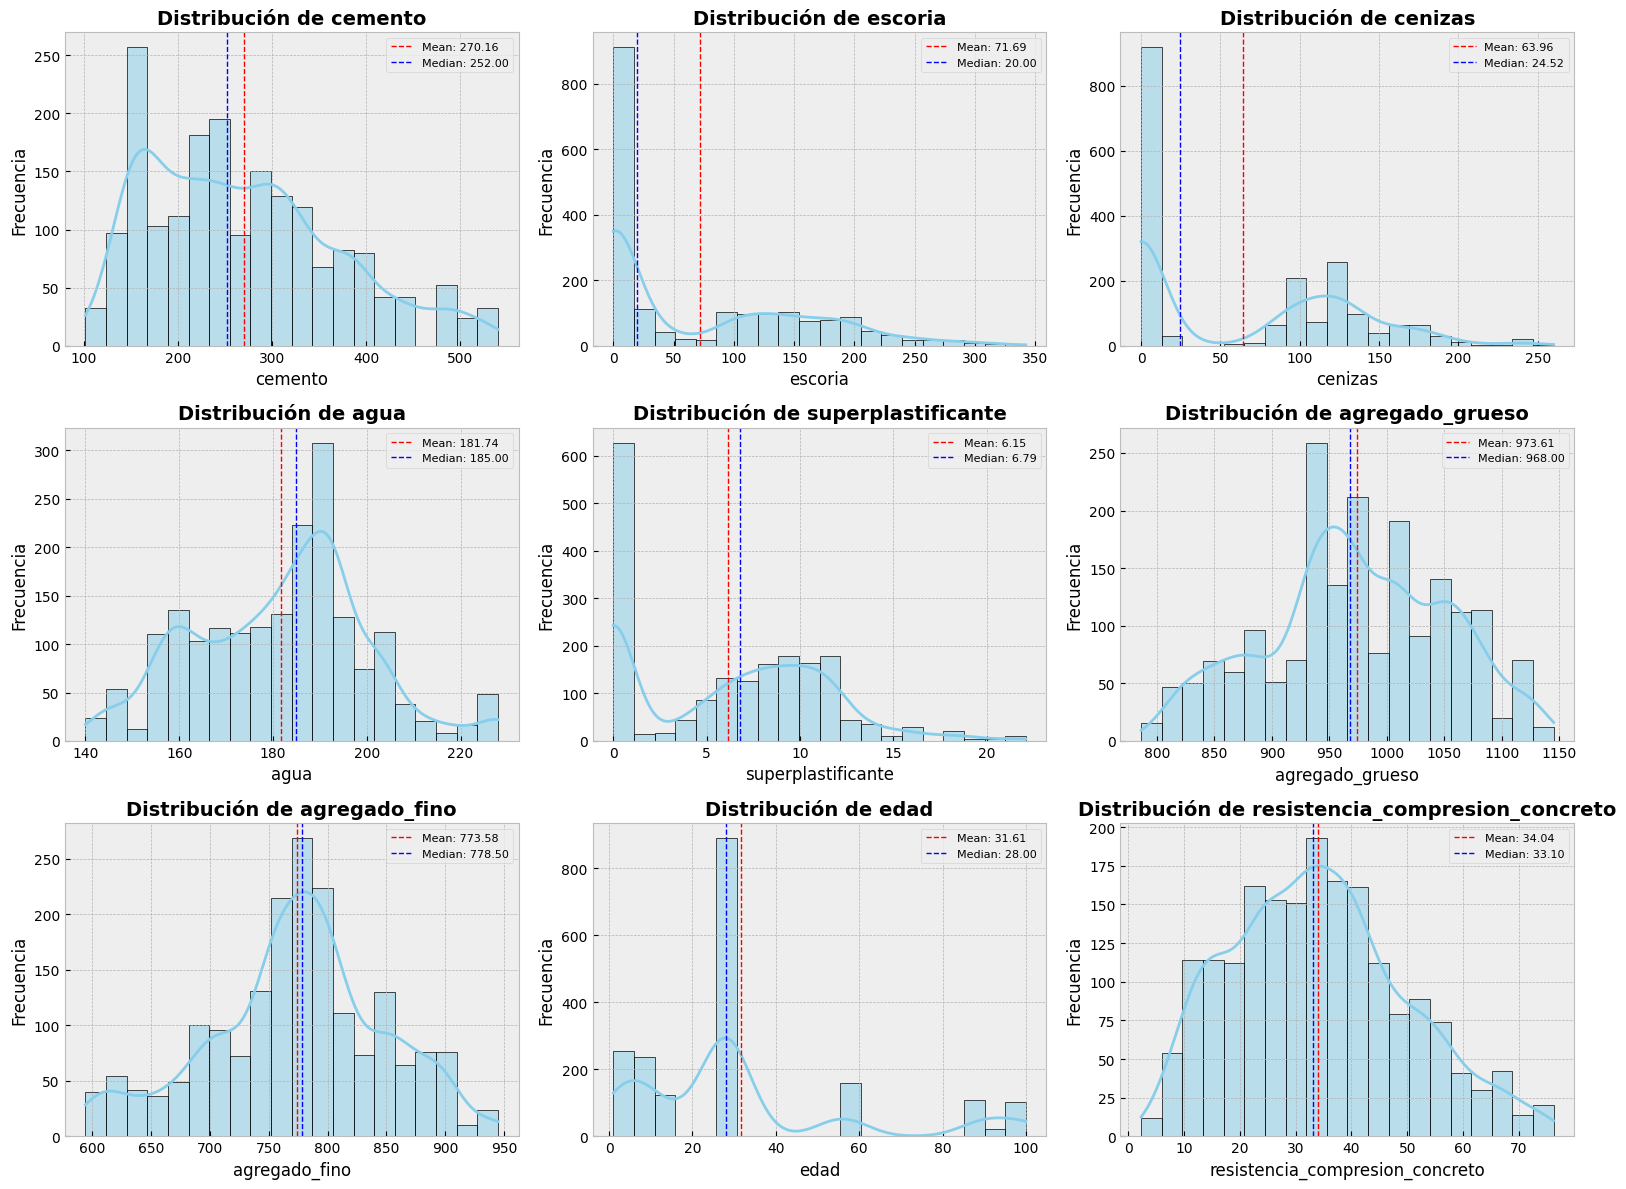

In [670]:
plot_distribution_data(concrete_data)

In [601]:
print(f"forma de la data: {concrete_data.shape}\n")

print(f"ESTADISTICAS DESCRIPTIVAS:\n")
concrete_data.describe().round(2).transpose()

forma de la data: (1892, 9)

ESTADISTICAS DESCRIPTIVAS:



,count,mean,std,min,25%,50%,75%,max
cemento,1892.0,270.16,101.05,102.00,182.04,252.00,332.50,540.00
escoria,1892.0,71.69,85.17,0.00,0.00,20.00,141.30,342.10
cenizas,1892.0,63.96,67.92,0.00,0.00,24.52,121.89,260.00
agua,1892.0,181.74,18.48,140.00,168.00,185.00,192.00,228.00
superplastificante,1892.0,6.15,5.19,0.00,0.00,6.79,10.00,22.10
agregado_grueso,1892.0,973.61,78.44,786.20,931.20,968.00,1031.00,1145.00
agregado_fino,1892.0,773.58,75.33,594.00,734.00,778.50,820.00,945.00
edad,1892.0,31.61,27.38,1.00,7.00,28.00,28.00,100.00
resistencia_compresion_concreto,1892.0,34.04,15.58,2.33,22.63,33.10,43.82,76.24


### 🔗 3. Matriz de correlación entre variables

In [602]:
def plot_correlation_matrix(data):
    plt.figure(
        figsize=(14, 8)
        )
    
    # Calculamos la matriz de correlación - 'pearson', 'spearman', 'kendall'
    corr = data.corr()
    # Crear una máscara para la parte superior de la matriz
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Crear heatmap
    sns.heatmap(
        corr, 
        mask=mask, 
        annot=True, 
        fmt=".2f", 
        cmap='coolwarm', 
        vmax=1, 
        vmin=-1,
        square=True, 
        cbar_kws={"shrink": .8}
        )
    
    plt.title('Matriz de Correlación entre Variables', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('outputs/correlacion.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_scatter_relationsships(data):
    fig, axes = plt.subplots(
        nrows=2, 
        ncols=4, 
        figsize=(16, 10)
        )
    axes = axes.ravel()  # Flatten the axes array for easy iteration
    
    features = [col for col in data.columns if col != 'resistencia_compresion_concreto']
    for i, feature in enumerate(features):
        # plot scatter
        # axes[i].scatter(data[feature], data['resistencia_compresion_concreto'], alpha=0.6)
        sns.regplot(data=data, x=data[feature], y=data['resistencia_compresion_concreto'], ax=axes[i], scatter_kws={"s": 15}, line_kws={"color": "red"})
        # sns.scatterplot(x=data['resistencia_compresion_concreto'], y=data[feature], alpha=0.6)
        axes[i].set_title(f'resistencia_compresion_concreto vs {feature}', fontsize=8, fontweight='bold')
        # axes[i].set_xlabel('resistencia_compresion_concreto')
        axes[i].set_ylabel(feature)
        axes[i].grid(True, alpha=0.7)
        # Linea de tendencia
        z = np.polyfit(data[feature], data['resistencia_compresion_concreto'], 1)
        p = np.poly1d(z)
        axes[i].plot(data[feature], p(data[feature]), color='red', linestyle='dashed', linewidth=1, label='Tendencia')
        # Correlación - 'pearson', 'spearman', 'kendall'
        corr = data[[feature, 'resistencia_compresion_concreto']].corr(method='spearman').iloc[0, 1]
        axes[i].text(0.05, 0.95, f'Correlación: {corr:.2f}', transform=axes[i].transAxes, 
                     fontsize=12, verticalalignment='top', bbox=dict(facecolor='yellow', alpha=0.5))

    plt.tight_layout()
    plt.show()

In [603]:
# concrete_data = concrete_data.drop(columns=['Edad'], axis=1)
# display( concrete_data.head(5) )

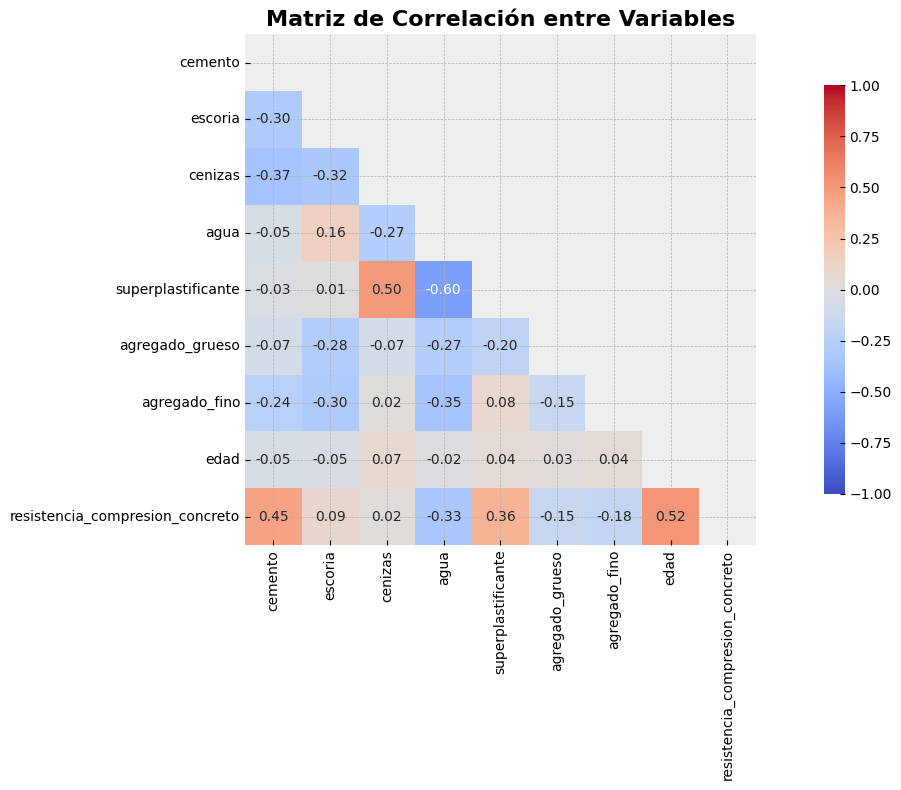

In [604]:
plot_correlation_matrix(concrete_data)

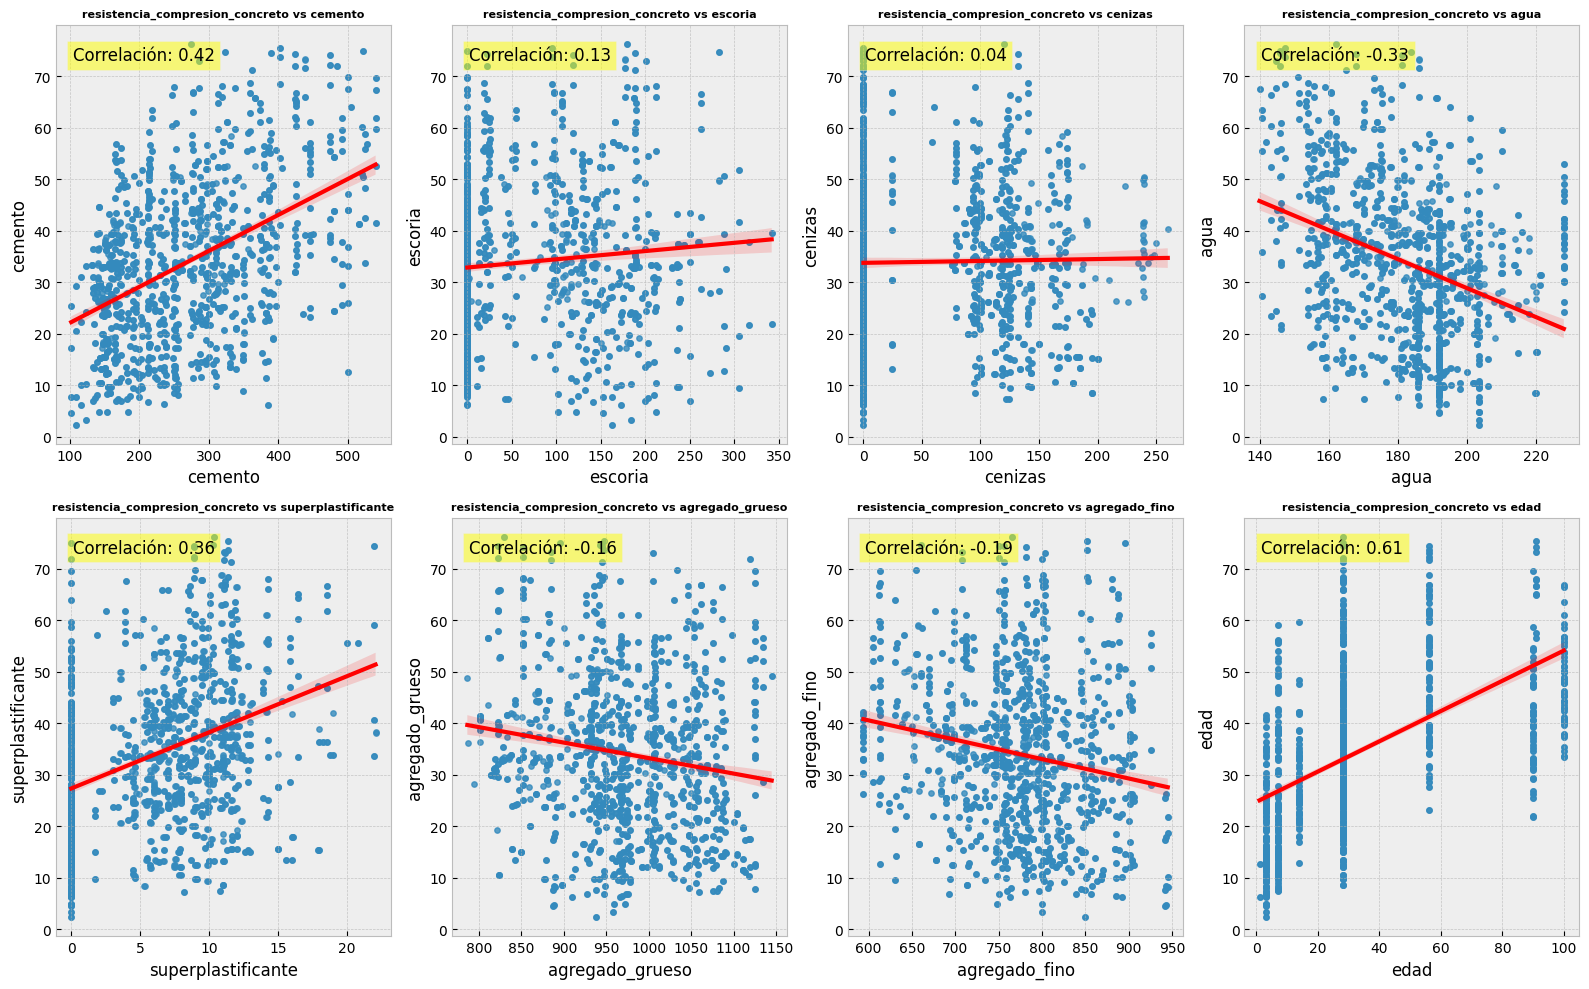

In [605]:
plot_scatter_relationsships(concrete_data)

In [606]:
# cols = ['cemento','agua','superplastificante','edad','resistencia_compresion_concreto']
# pd.plotting.scatter_matrix(concrete_data[cols], figsize=(8, 8))
# # sns.pairplot(concrete_data)
# plt.show()

#### 2.3 Analisis univariado con Función de densidad de probabilidad (PDF)  y Funciona de probabilidad acumulada (CDF)

,0,1,2,3
0,0.004720,0.034884,2.330,0.034884
1,0.016305,0.120507,9.721,0.155391
2,0.019594,0.144820,17.112,0.300211
3,0.021739,0.160677,24.503,0.460888
4,0.025601,0.189218,31.894,0.650106
5,0.019523,0.144292,39.285,0.794397
6,0.012014,0.088795,46.676,0.883192
7,0.008224,0.060782,54.067,0.943975
8,0.005149,0.038055,61.458,0.982030
9,0.002431,0.017970,68.849,1.000000


Text(0.5, 0, 'resistencia_compresion_concreto')

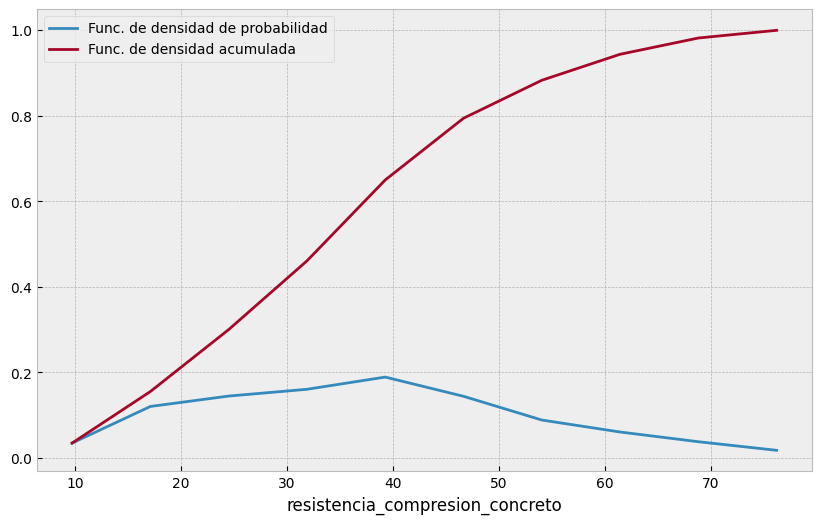

In [607]:
target_column = 'resistencia_compresion_concreto'

counts, bin_edges = np.histogram(concrete_data[target_column],bins = 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

display( pd.DataFrame( [counts, pdf, bin_edges, cdf]).transpose() )

plt.plot(bin_edges[1:], pdf, label='Func. de densidad de probabilidad')
plt.plot(bin_edges[1:], cdf, label='Func. de densidad acumulada')
plt.legend() # 'cumulative distribution function'
plt.grid(True)
plt.xlabel(target_column)

In [608]:
def variacion_univariado(target, compare_data, concrete_data):
    fig, axes = plt.subplots(
        figsize=(6, 4)
        )
    # plt.scatter(concrete_data["agregado_fino"], concrete_data["resistencia_compresion_concreto"],
    #         c=concrete_data["agua"], s=concrete_data["superplastificante"]*8,
    #         linewidth=1,edgecolor="k",cmap="viridis")
    sns.scatterplot(
        y=target, 
        x=compare_data[0], hue=compare_data[1], size=compare_data[2], 
        data=concrete_data, 
        ax=axes, sizes= (50,300))
    axes.set_title(f"CC r_compresion_c vs ({compare_data})")
    axes.legend(loc="upper left", bbox_to_anchor=(1,1))

    plt.tight_layout()
    plt.show()

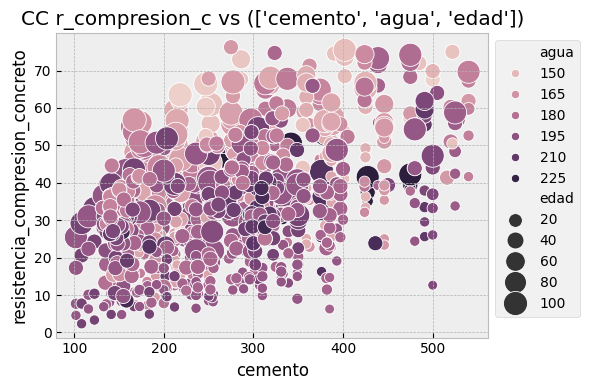

In [609]:
target_y = 'resistencia_compresion_concreto'
data_x = ['cemento', "agua", "edad"]

variacion_univariado(target_y, data_x, concrete_data)

**Interpretación**: Se observa que ... 
1. la resistencia a la compresion aumenta con la cantidad del cemento.
2. la resistencia a la compresion aumenta con la edad
3. El cemeneto con menos años requiere mas cemento para mayor resistencia.
4. Cunto mas años tenga el cemento mas agua se requerirá.
5. La resistencia del hormigon aumenta cuando se utiliza menos agua en su preparación.

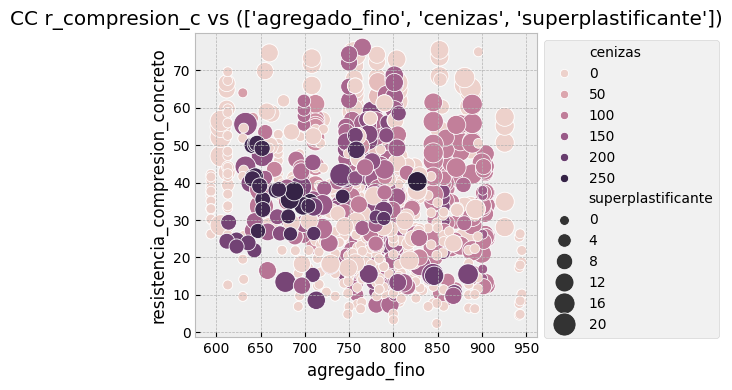

In [610]:
target_y = 'resistencia_compresion_concreto'
data_x = ['agregado_fino', "cenizas", "superplastificante"]

variacion_univariado(target_y, data_x, concrete_data)

**Interpretación**: Se observa que ... 
1. ...
2. ...
3. ...

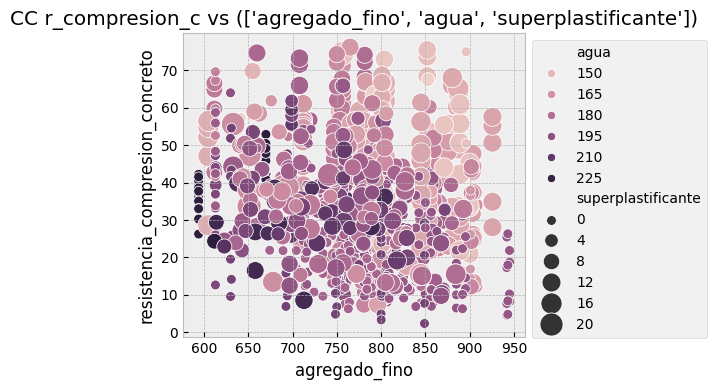

In [611]:
target_y = 'resistencia_compresion_concreto'
data_x = ['agregado_fino', "agua", "superplastificante"]

variacion_univariado(target_y, data_x, concrete_data)

**Interpretación**: Se observa que ... 
1. ...
2. ...
3. ...

### 🔧 4. Preprocesamiento y Arquitectura de Modelo

<img src="https://sdsclub.com/wp-content/uploads/2021/04/train-and-test-1-min-1.png" width="300">

🎯 **Objetivo del procesamiento**
```
Limpiar datos: remover variables calculadas temporales , 
dividir datos:  train/test split estratificado 
Normalizar fiatures: Preparar datos para redes neoronales,
Validar integridad: Asegurar cosistencia de Nombres
```

📊 **Preparacion de datos para modelado**
```
consistencia: los modelos necesitan en formato especifico
escalas: variables con diferentes rangos pueden dominar el aprendisaje
Generalizacion: Split adecuado previene overfitting
Reproducibilidad: Semillas o fijas para resultados consistentes
```

🧠 **¿Porque se normaliza en redes neoronales?**

Normalizar es el proceso para escalar los datos a una distribucion controlada y esto biene de la estadistica.
ejejmplo: sigma(0,1)

🎯 **Beneficios de la normalizacion**
- *Entrenamiento mas rapido y estable*  
   Mejora el rendimiento de desenso de gradiente

- *Evita que una carateristica domine a otra*  
   todas las entradas deben tener la misma importanciarelativa

- *Mejora la convergencia*  
  Permite llegar a soluciones óptimas mas rapidas

- *Reduce errores numericos*  
  Previene errores grandes o pequeñas

In [612]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

from sklearn.preprocessing import StandardScaler

In [613]:
target_column = 'resistencia_compresion_concreto'

# Separar las características y la variable objetivo

data_temp = concrete_data.to_numpy()
XX = data_temp[:,0:8]
y = data_temp[:,8]

# XX = concrete_data.drop(columns=[target_column], axis=1)
# y = concrete_data[target_column]

# revisamos los datos faltantes y lo arreglamos
nrows = XX.shape[0] # numero de registros

train_percent = 0.8 # uso de 80% para entrenamiento y 20% para prueba 

fiature_names = concrete_data.columns.tolist(); #data_keys

print(f" Features (X): {XX.shape}")
print(f" Target (y): {y.shape}")
print(f" Feature names: {fiature_names}\n")


 Features (X): (1892, 8)
 Target (y): (1892,)
 Feature names: ['cemento', 'escoria', 'cenizas', 'agua', 'superplastificante', 'agregado_grueso', 'agregado_fino', 'edad', 'resistencia_compresion_concreto']



#### 4.1 Conjuntos de Entrenamiento

In [614]:
# Binning the target variable into 5 categories
y_binned = pd.cut( 
    y, 
    bins=5, # Dividir en 5 categorías o frecuencias
    labels=False
)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    XX, y, 
    test_size=0.2, # 20% de los datos para prueba
    train_size=0.8, # 80% de los datos para entrenamiento
    random_state=42, 
    stratify=y_binned
)

print(f" Training set shape: {X_train.shape[0]}, sample {y_train.shape[0]/(len(XX))*100:.2f}%") # y_train.values
print(f" Test set shape: {X_test.shape[0]}, {y_test.shape[0]/len(XX)*100:.2f}%\n")


 Training set shape: 1513, sample 79.97%
 Test set shape: 379, 20.03%



#### 4.2 Escalamiento de datos

**Stadard Scaler**

$$z^{(j)}_i = \frac{x^{(j)}_i - \mu^{(j)}}{\sigma^{(j)}}$$

- $x^{(j)}_i$ : valor original de la muestra $i$ para la característica $j$
- $z^{(j)}_i$ : valor estandarizado de la muestra $i$ para la característica $j$
- $\mu^{(j)}$ : media de la característica $j$
- $\sigma^{(j)}$ : desviación estándar de la característica $j$

In [615]:
# Escalar las características
scaler = StandardScaler()
display(scaler)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


StandardScaler()

In [616]:
# x, y = np.meshgrid(X_test_scaled, y_test)
# z = -0.5 * x + 0.5 * y

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # ax.plot_surface(x, y, z, cstride=1, rstride=1, shade=False, cmap='viridis')
# # ax.plot_wireframe(x, y, z)

# sc = ax.scatter(x, y, z, c=z, cmap='viridis')
# fig.colorbar(sc)

# ax.set_aspect('equal', adjustable='box')
# ax.set_xlabel('x')
# ax.set_ylabel('y')

# plt.show()

#### 4.3 Conjuntos de Entrenamiento y Escalamiento de datos

In [617]:
# def prepare_data(data):
#     target_column = 'resistencia_compresion_concreto'

#     # Separar las características y la variable objetivo
#     XX = data.drop(columns=[target_column], axis=1)
#     y = data[target_column]

#     fiature_names = XX.columns.tolist()

#     print(f" Features (X): {XX.shape}")
#     print(f" Target (y): {y.shape}")
#     print(f" Feature names: {fiature_names}\n")

#     # Binning the target variable into 5 categories
#     y_binned = pd.cut(
#         y, 
#         bins=5, # Dividir en 5 categorías o frecuencias
#         labels=False
#         ) 
    
#     # Dividir los datos en conjuntos de entrenamiento y prueba
#     X_train, X_test, y_train, y_test = train_test_split(
#         XX, y, 
#         test_size=0.2, # 20% de los datos para prueba
#         train_size=0.8, # 80% de los datos para entrenamiento
#         random_state=42, 
#         stratify=y_binned)

#     print(f" Training set shape: {X_train.shape[0]}, sample {y_train.shape[0]/(len(XX))*100:.2f}%")
#     print(f" Test set shape: {X_test.shape[0]}, {y_test.shape[0]/len(XX)*100:.2f}%\n")
    
#     # Escalar las características
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.transform(X_test)
    
#     return (X_train_scaled, X_test_scaled, y_train, y_test, scaler, fiature_names)


In [618]:
# X_train_scaled, X_test_scaled, y_train, y_test, scaler, fiature_names = prepare_data(concrete_data)

#### 🧠 4.4 Configuración de la Arquitectura para la Red Neoronal

<!-- ![image.png](attachment:image.png) -->

In [619]:
print(f"ARQUITECTURA DE LA RED NEURONAL (MLPRegressor)")
print("="*50)

# configuracion de la red neuronal
nn_config = {
    'hidden_layer_sizes': (100, 50, 25), # 3 capas ocultas con 100, 50 y 25 neuronas respectivamente
    'activation': 'relu', # Función de activación
    'solver': 'adam', # Optimizador
    'learning_rate_init': 0.001, # Tasa de aprendizaje inicial
    'max_iter': 1000, # Número máximo de iteraciones
    'random_state': 42, # Semilla para reproducibilidad
    'early_stopping': True, # Detener el entrenamiento si no hay mejora
    'validation_fraction': 0.1, # Fracción de datos para validación
    'n_iter_no_change': 10, # Número de iteraciones sin cambio para detener el entrenamiento
}

print(f"ESTRUCTURA DE CAPAS:\n")
print(f" - Capas de entrada: {len(X_train_scaled[0])} neuronas (una por entrada)")
print(f" - Capas ocultas 1: {nn_config['hidden_layer_sizes'][0]} reuronas + ReLu")
print(f" - Capas ocultas 2: {nn_config['hidden_layer_sizes'][1]} reuronas + ReLu")
print(f" - Capas ocultas 3: {nn_config['hidden_layer_sizes'][2]} reuronas + ReLu")
print(f" - Capas de salida: 1 neurona (regresión continua)")
print(f" - Tasa de aprendizaje inicial: {nn_config['learning_rate_init']}")
print(f" - Número máximo de iteraciones: {nn_config['max_iter']}")

ARQUITECTURA DE LA RED NEURONAL (MLPRegressor)
ESTRUCTURA DE CAPAS:

 - Capas de entrada: 8 neuronas (una por entrada)
 - Capas ocultas 1: 100 reuronas + ReLu
 - Capas ocultas 2: 50 reuronas + ReLu
 - Capas ocultas 3: 25 reuronas + ReLu
 - Capas de salida: 1 neurona (regresión continua)
 - Tasa de aprendizaje inicial: 0.001
 - Número máximo de iteraciones: 1000


### 🏋️5. Algoritmos y Entrenamiento Red Neuronal

In [620]:
from xgboost import XGBRegressor

from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.neural_network import MLPRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error, mean_squared_error, r2_score, mean_absolute_error

import time


In [621]:
def train_red_neuronal(X_train_scaled, y_train, nn_config):

    # Crear el modelo de red neuronal
    model_lr = LinearRegression() # Regresion lineal multiple
    model_lasso = Lasso() # Lasso Regression
    model_ridge = Ridge() # Ridge Regression

    model_xgrr = XGBRegressor()
    
    model_svr = SVR(kernel='rbf',C=1000,epsilon=0.04,gamma=0.5,degree=1)

    model_mlpr = MLPRegressor(**nn_config) # pasar clave - valor del diccionario **nn_config

    model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

    display(model_lr)     # despliegle de la respuesta
    display(model_lasso)  # ... 
    display(model_ridge)  # ... 
    display(model_xgrr)  # ... 
    display(model_rf)  # ... 
    display(model_mlpr)  # ... 
    display(model_svr)  # ... 
    
    # Entrenar el modelo y/o ajustar el modelo de datos entrenados
    model_lr.fit(X_train_scaled, y_train) # fitting the linear regression model
    model_lasso.fit(X_train_scaled, y_train) # fitting lasso regression model
    model_ridge.fit(X_train_scaled, y_train) # fitting the ridge regression model
    model_xgrr.fit(X_train_scaled, y_train)
    model_rf.fit(X_train_scaled, y_train)
    model_mlpr.fit(X_train_scaled, y_train)
    model_svr.fit(X_train_scaled, y_train)

    display(model_lr)     # despliegle de la respuesta
    display(model_lasso)  # ... 
    display(model_ridge)  # ... 
    display(model_xgrr)  # ... 
    display(model_rf)  # ... 
    display(model_mlpr)  # ... 
    display(model_svr)  # ... 

    print(f"\n🧠 ENTRENANDO RED NEURONAL:")
    print(f"  📊 Datos de entrada (X_train): {X_train_scaled.shape}")
    print(f"  🔄 Iteraciones ejecutadas (MLPRegressor): {model_mlpr.n_iter_}") # ⚙
    
    return (model_xgrr, model_rf, model_mlpr, model_svr, model_lr, model_lasso, model_ridge)


In [622]:
xgrr_model, rf_model, mlpr_model, svr_model, lr_model, lasso_model, ridge_model = train_red_neuronal(X_train_scaled, y_train, nn_config)

LinearRegression()

Lasso()

Ridge()

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

RandomForestRegressor(random_state=42)

MLPRegressor(early_stopping=True, hidden_layer_sizes=(100, 50, 25),
             max_iter=1000, random_state=42)

SVR(C=1000, degree=1, epsilon=0.04, gamma=0.5)

LinearRegression()

Lasso()

Ridge()

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

RandomForestRegressor(random_state=42)

MLPRegressor(early_stopping=True, hidden_layer_sizes=(100, 50, 25),
             max_iter=1000, random_state=42)

SVR(C=1000, degree=1, epsilon=0.04, gamma=0.5)


🧠 ENTRENANDO RED NEURONAL:
  📊 Datos de entrada (X_train): (1513, 8)
  🔄 Iteraciones ejecutadas (MLPRegressor): 293


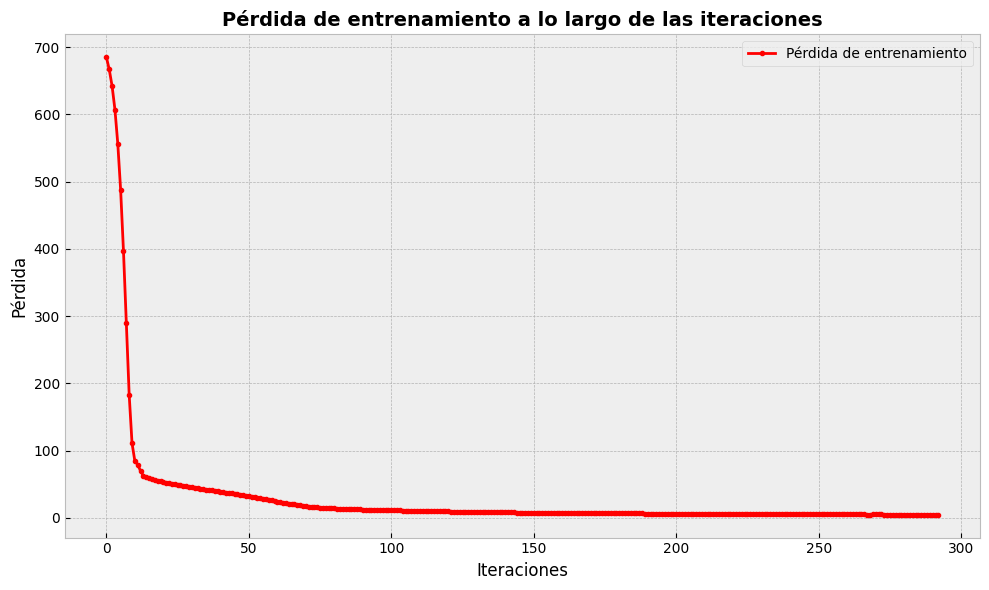

In [623]:
plt.plot(mlpr_model.loss_curve_, '.-', color='red', label='Pérdida de entrenamiento')
# plt.plot(lr_model.singular_, '.-', color='blue', label='Pérdida de entrenamiento')

plt.title('Pérdida de entrenamiento a lo largo de las iteraciones', fontsize=14, fontweight='bold')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [624]:
def cross_validation(X_train,y_train,model,n_folds=10):
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=1)

    start_time = time.time()
    scores = []
    fold_index = 0

    for train_index, val_index in kf.split(X_train):
        X_tr = X_train[train_index]
        y_tr = y_train[train_index]

        X_val = X_train[val_index]
        y_val = y_train[val_index]

        model.fit(X_tr,y_tr)
        y_pred = model.predict(X_val)

        r2 = r2_score(y_val,y_pred)
        rmse = root_mean_squared_error(y_val,y_pred)
        mae = mean_absolute_error(y_val,y_pred)
        mape = mean_absolute_percentage_error(y_val,y_pred)

        scores.append([r2,rmse,mae,mape])
        fold_index += 1

    scores = np.array(scores)
    print('k-fold mean:              ', scores.mean(0))
    print('k-fold standard deviation:', scores.std(0))
    # Running time
    print('Running time: %.3fs ' % (time.time() - start_time))

    return scores, model

In [625]:
model_reg_lin = LinearRegression()
scores, model_reg_lin = cross_validation(X_train,y_train, model_reg_lin)

display( pd.DataFrame([*scores.tolist()], columns=['r2', 'rmse (MPa)', 'mae (MPa)', 'mape (%)']) )

# model_reg_lin.fit(X_train,y_train)
# y_pred = model_reg_lin.predict(X_test)

k-fold mean:               [0.75176415 7.74212824 6.00845757 0.22479339]
k-fold standard deviation: [0.01806226 0.32509519 0.22921492 0.01597371]
Running time: 0.072s 


,r2,rmse (MPa),mae (MPa),mape (%)
0,0.769571,7.748360,5.938051,0.211243
1,0.736814,7.709009,5.782930,0.201536
2,0.740351,7.538061,5.854993,0.207849
3,0.734224,7.868475,5.986755,0.236609
4,0.737701,7.858256,6.200461,0.221182
5,0.753821,8.397105,6.432276,0.246730
6,0.733104,8.037064,6.377572,0.225958
7,0.783583,7.162141,5.846399,0.225455
8,0.778558,7.723921,5.880958,0.253948
9,0.749915,7.378889,5.784180,0.217423


In [626]:
model_svm1 = SVR(kernel='rbf',C=1000,epsilon=0.04,gamma=0.5,degree=1)
scores, model_svm1 = cross_validation(X_train,y_train,model_svm1)

display( pd.DataFrame([*scores.tolist()], columns=['r2', 'rmse (MPa)', 'mae (MPa)', 'mape (%)']) )

# model_svm1.fit(X_train,y_train)
# y_pred = model_svm1.predict(X_test)

k-fold mean:               [0.75432616 7.70238104 3.36618238 0.15103107]
k-fold standard deviation: [0.0364767  0.79527815 0.42386787 0.03959023]
Running time: 2.649s 


,r2,rmse (MPa),mae (MPa),mape (%)
0,0.686128,9.043099,4.183844,0.172228
1,0.734008,7.750000,3.737428,0.186286
2,0.772555,7.055121,3.301367,0.155045
3,0.823298,6.415845,2.777267,0.111708
4,0.793959,6.964740,2.910307,0.111667
5,0.720207,8.952045,3.779692,0.217820
6,0.767628,7.499266,3.248220,0.147292
7,0.756269,7.600691,3.082718,0.195967
8,0.749495,8.215149,3.605067,0.119320
9,0.739716,7.527854,3.035914,0.092978


### 📏 6. Evaluacion de Modelo y Métricas

$y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_m x_m $

1. **RMSE – Root Mean Squared Error**

El RMSE mide el **error cuadrático medio** entre los valores reales y los predichos. Penaliza más los errores grandes (por estar al cuadrado) y se expresa en las mismas unidades que la variable objetivo.


\begin{equation}
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
\end{equation}


- $ y_i $: valor real  
- $ \hat{y}_i $: valor predicho  
- $ n $: número de muestras  

2. **MAE – Mean Absolute Error**

El MAE mide el **Promedio del valor absoluto de los errores o Error Medio Absoluto Porcentual**. Es más robusto frente a valores atípicos (outliers) porque no eleva al cuadrado las diferencias.


\begin{equation}
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
\end{equation}

Donde:

- $y_i$ : valor real
- $\hat{y_i}$: valor predicho
- $n$ : número de muestras

In [627]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

3. **$R^2$ – Coeficiente de Determinación**

$R^2$ indica la **proporción de la variancia** de los valores reales explicada por el modelo. Su rango típico es de 0 a 1 (puede ser negativo si el modelo es muy malo).


\begin{equation}
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
\end{equation}


- $ \bar{y} $: media de los valores reales  


In [628]:
# # Define the regression models
# models = {
#     'lin_reg': LinearRegression(),
#     'ridge': Ridge(),
#     'lasso': Lasso(),
#     'rf_reg': RandomForestRegressor(n_estimators=100, random_state=42),
#     # 'xgb_reg': XGBRegressor(),
# }

# for name ,model in models.items():
#     model.fit(X_train_scaled,y_train)
#     y_pred = model.predict(X_test_scaled)
    
#     print(f"{name} : {r2_score(y_test,y_pred)}")

In [629]:
def create_model(xgrr_model, rf_model, mlpr_model, svr_model, lr, lasso, ridge, X_test_scaled, y_test):
    print(f"Datos de entrada (X_test): {X_test_scaled.shape}")
    
    # Predecir con el modelo
    y_pred_lr = lr.predict(X_test_scaled) # predicting the test with linear regression model
    y_pred_lasso = lasso.predict(X_test_scaled) # predicting the test with lasso regression model
    y_pred_ridge = ridge.predict(X_test_scaled) # predicting the test with ridge regression model    
    y_pred_xgrr = xgrr_model.predict(X_test_scaled)
    y_pred_rf = rf_model.predict(X_test_scaled)
    y_pred_mlpr = mlpr_model.predict(X_test_scaled)
    y_pred_svr = svr_model.predict(X_test_scaled)
    
    # Calcular métricas de evaluación
    print(f"\nRED NEURONAL: metricas de rendimiento")
    # print(root_mean_squared_error(y_test, y_pred_svr) == np.sqrt(mean_squared_error(y_test, y_pred_svr)))
    response_frm = [
        [np.sqrt(mean_squared_error(y_test, y_pred_xgrr)), mean_squared_error(y_test, y_pred_xgrr), mean_absolute_error(y_test, y_pred_xgrr),  mean_absolute_percentage_error(y_test,y_pred_xgrr), r2_score(y_test, y_pred_xgrr)],
        [np.sqrt(mean_squared_error(y_test, y_pred_rf)), mean_squared_error(y_test, y_pred_rf), mean_absolute_error(y_test, y_pred_rf),  mean_absolute_percentage_error(y_test,y_pred_rf), r2_score(y_test, y_pred_rf)],
        [np.sqrt(mean_squared_error(y_test, y_pred_mlpr)), mean_squared_error(y_test, y_pred_mlpr), mean_absolute_error(y_test, y_pred_mlpr),  mean_absolute_percentage_error(y_test,y_pred_mlpr), r2_score(y_test, y_pred_mlpr)],
        [np.sqrt(mean_squared_error(y_test, y_pred_svr)), mean_squared_error(y_test, y_pred_svr), mean_absolute_error(y_test, y_pred_svr),  mean_absolute_percentage_error(y_test,y_pred_svr), r2_score(y_test, y_pred_svr)],
        [np.sqrt(mean_squared_error(y_test, y_pred_lr)), mean_squared_error(y_test, y_pred_lr), mean_absolute_error(y_test, y_pred_lr),  mean_absolute_percentage_error(y_test,y_pred_lr), r2_score(y_test, y_pred_lr)],
        [np.sqrt(mean_squared_error(y_test, y_pred_lasso)), mean_squared_error(y_test, y_pred_lasso), mean_absolute_error(y_test, y_pred_lasso),  mean_absolute_percentage_error(y_test,y_pred_lasso), r2_score(y_test, y_pred_lasso)],
        [np.sqrt(mean_squared_error(y_test, y_pred_ridge)), mean_squared_error(y_test, y_pred_ridge), mean_absolute_error(y_test, y_pred_ridge),  mean_absolute_percentage_error(y_test,y_pred_ridge), r2_score(y_test, y_pred_ridge)],
    ]
    display( pd.DataFrame(
        response_frm, columns=['RMSE (MPa)','MSE','MAE (MPa)','MAPE (%)','R2'], 
        index=['XGBRegressor', 'RandomForestRegressor', 'MLPRegressor', 'SVR', 'LinearRegression Regression','Lasso Regression','Ridge Regression']
        ) )

    print(f"     • Resistencia de compresión del concreto (y_test): {y_test.mean():.2f} MPa")

    error_percentual = np.abs(np.sqrt(mean_squared_error(y_test, y_pred_mlpr)) / y_test.mean()) * 100
    print(f"     • Error RMSE como % de resistencia promedio: {error_percentual:.1f}%")

    return {
        "report": 
        {
            "name_regressor": ['XGBRegressor', 'RandomForestRegressor', 'MLPRegressor', 'SVR', 'LinearRegression Regression','Lasso Regression','Ridge Regression'],
            "predicted": [y_pred_xgrr, y_pred_rf, y_pred_mlpr, y_pred_svr, y_pred_lr, y_pred_lasso, y_pred_ridge]
        }
    }

In [630]:
response = create_model(xgrr_model, rf_model, mlpr_model, svr_model, lr_model, lasso_model, ridge_model, X_test_scaled, y_test)

Datos de entrada (X_test): (379, 8)

RED NEURONAL: metricas de rendimiento


,RMSE (MPa),MSE,MAE (MPa),MAPE (%),R2
XGBRegressor,2.444671,5.976415,1.305682,4.510279,0.975141
RandomForestRegressor,2.733110,7.469888,1.775843,6.384017,0.968929
MLPRegressor,4.093965,16.760547,2.932981,10.262719,0.930285
SVR,4.169972,17.388664,1.500411,4.526967,0.927673
LinearRegression Regression,7.621285,58.083984,5.974183,22.438964,0.758402
Lasso Regression,8.078100,65.255697,6.448454,26.886020,0.728571
Ridge Regression,7.615725,57.999266,5.969745,22.435988,0.758754


     • Resistencia de compresión del concreto (y_test): 34.24 MPa
     • Error RMSE como % de resistencia promedio: 12.0%


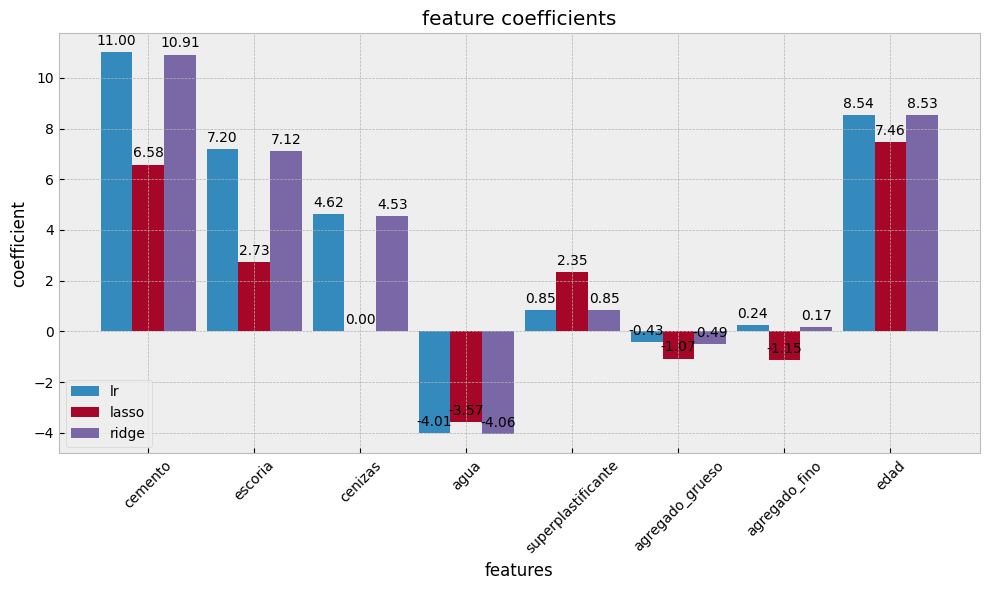

In [631]:
y_pred_xgrr = response['report']['predicted'][0]
y_pred_rf = response['report']['predicted'][1]
y_pred_mplr = response['report']['predicted'][2]
y_pred_svr = response['report']['predicted'][3]
y_pred_lr, y_pred_lasso, y_pred_ridge = response['report']['predicted'][4], response['report']['predicted'][5], response['report']['predicted'][6]

coeff_lr = lr_model.coef_       #linear regression coefficients
coeff_lasso = lasso_model.coef_ #lasso regression coefficients
coeff_ridge = ridge_model.coef_ #ridge regression coefficients

labels = data_keys[:-1]

x = np.arange(len(labels))
width = 0.3

fig,ax = plt.subplots()
rects1 = ax.bar(x - 2*(width/2), coeff_lr, width, label = 'lr')
rects2 = ax.bar(x, coeff_lasso, width, label = 'lasso')
rects3 = ax.bar(x + 2*(width/2), coeff_ridge, width, label = 'ridge')

ax.set_ylabel('coefficient')
ax.set_xlabel('features')
ax.set_title('feature coefficients')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation = 45)
ax.legend()

def autolabel(rects):
  """Attach a text label above each bar in *rects*, displaying its height."""
  for rect in rects:
    height = rect.get_height()
    ax.annotate('{:.2f}'.format(height), xy = (rect.get_x() + rect.get_width() / 2, height), 
                 xytext = (0, 3), textcoords = 'offset points', ha = 'center', va = 'bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

### 7. Arquitectura Red-Neoronal

In [632]:
from scipy.stats import gaussian_kde

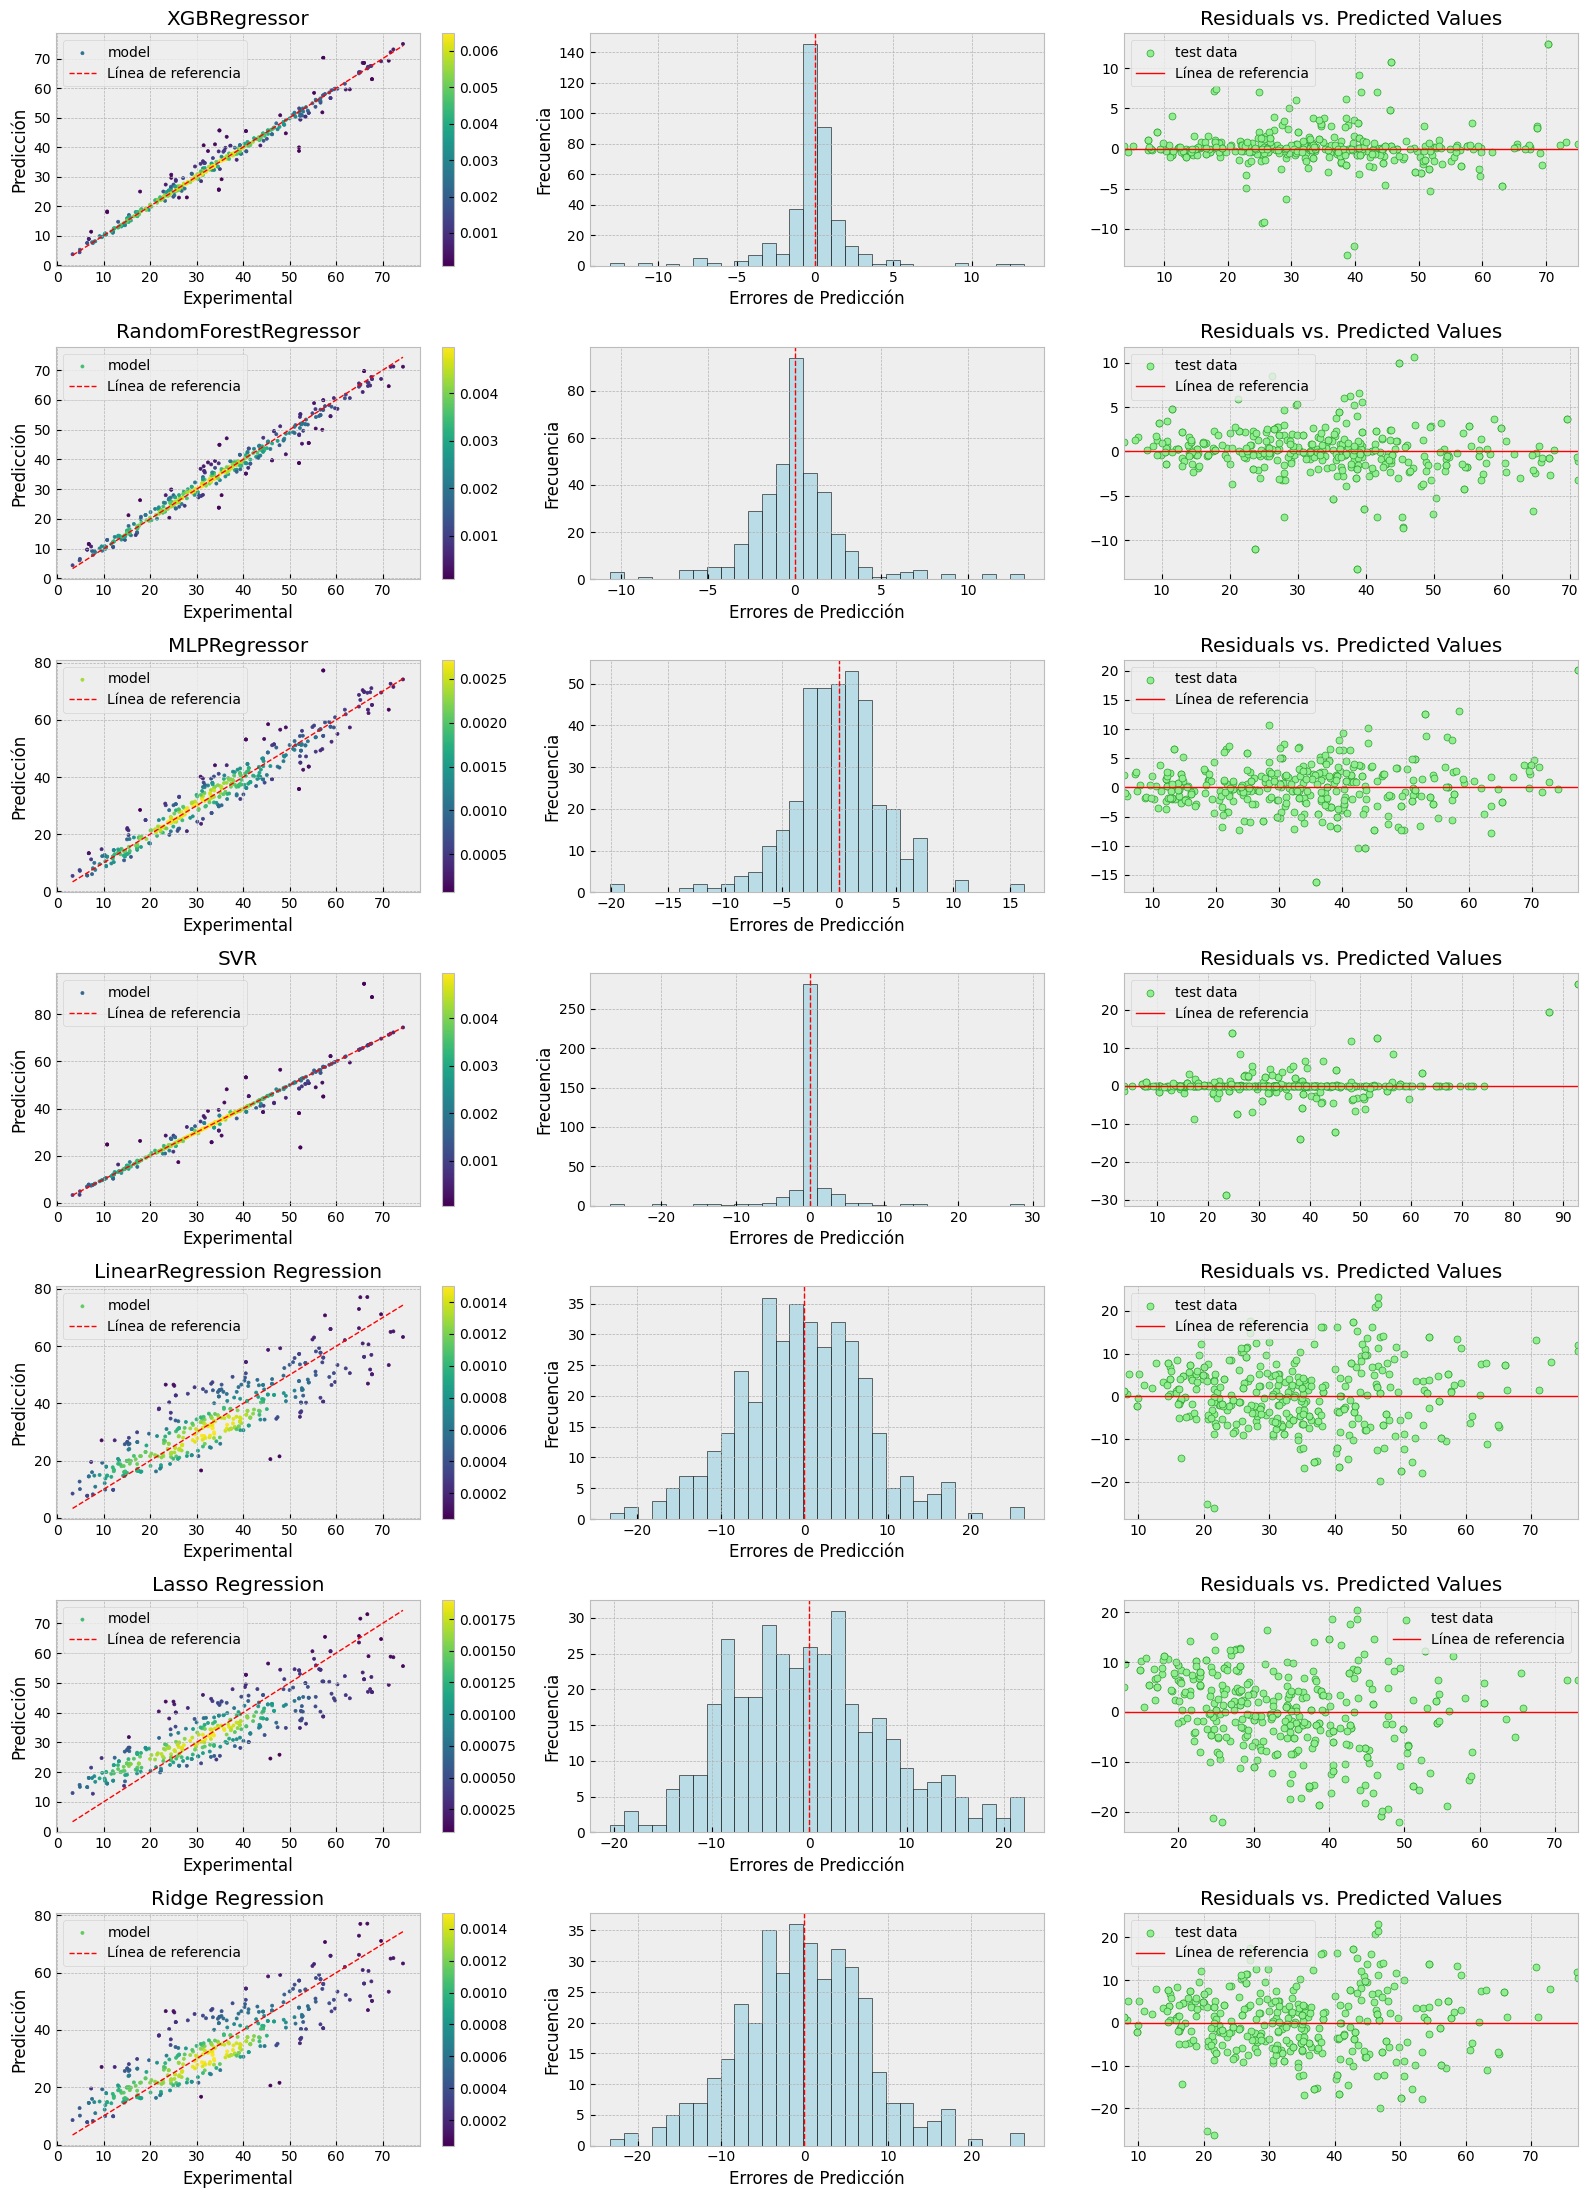

In [633]:
number_models = 7

fig, axes =  plt.subplots(number_models, 3, figsize=(16, 24))

for i in range(number_models):
    y_pred = response['report']['predicted'][i]
    
    xy = np.vstack([y_test, y_pred])
    z = gaussian_kde(xy)(xy)

    nn_errors = y_test - y_pred

    x_max = np.max(
        [np.max(y_pred), np.max(y_pred)]
    )
    x_min = np.min(
        [np.min(y_pred), np.min(y_pred)]
    )

    # scatter plot
    # axes[i,0].scatter(y_test, y_pred, alpha=0.6, color='steelblue')
    scatter = axes[i,0].scatter(y_test, y_pred, c=z, label='model', s=5)
    cbar = fig.colorbar(scatter)
    axes[i,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed', linewidth=1, label='Línea de referencia')
    axes[i,0].set_title(response['report']['name_regressor'][i])

    # axes[i,0].set_title('Predicciones vs Valores Reales', fontsize=14, fontweight='bold')
    axes[i,0].set_ylabel('Predicción')
    axes[i,0].set_xlabel('Experimental')
    # axes[i,0].grid(True, alpha=0.7)
    axes[i,0].legend(loc='best')

    axes[i,1].hist(nn_errors, bins=30, color='lightblue', edgecolor='black', alpha=0.8)
    axes[i,1].axvline(0, color='red', linestyle='dashed', linewidth=1, label='Error Cero')

    # axes[i,1].set_title('Distribución de Errores de Predicción', fontsize = 14, fontweight='bold')
    axes[i,1].set_xlabel('Errores de Predicción')
    axes[i,1].set_ylabel('Frecuencia')
    # axes[i,1].grid(True, alpha=0.7)

    axes[i,2].set_title("Residuals vs. Predicted Values")
    axes[i,2].scatter(y_pred, y_pred-y_test, color='lightgreen', marker='o', s=25, edgecolors='tab:green', label='test data')
    axes[i,2].plot([y_pred.min(), y_pred.max()], [0, 0], color='red', linestyle='-', linewidth=1, label='Línea de referencia')
    axes[i,2].grid(True)
    # axes[i,2].set_xlabel('y predict')
    axes[i,2].set_xlim([x_min, x_max])
    axes[i,2].legend()

# fig.suptitle('True vs predicted')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])


In [634]:
import plotly.graph_objs as go

y_pred = response['report']['predicted'][0]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=y_test, 
    y=y_pred, 
    mode='markers', 
    name='Predicciones',
    marker=dict(color='blue', size=5)
))
fig.add_trace(go.Scatter(
    x=y_test, 
    y=y_test, 
    mode='lines', 
    name='Línea de referencia',
    line=dict(color='red', width=2)
))
fig.update_layout(
    title='Predicciones vs Valores Reales',
    xaxis_title='Valores Reales (mm)',
    yaxis_title='Predicciones (mm)',
    width=800,
    height=600
)
fig.show()

### 🤔 8. Save data model entraned

In [635]:
# Para la persistencia de datos entrenados
import joblib
import pickle

In [636]:
def save_neural_network_model(nn_model, scaler, feature_names):
    # GUARDAR EL MODELO ENTRENADO
    joblib.dump(nn_model, 'outputs/red_neuronal_modelo.pkl')
    print(f"Modelo guardado: 'outputs/red_neuronal_modelo.pkl'")
    
    # GUARDAR EL SCALER
    joblib.dump(scaler, 'outputs/scaler_normalizacion.pkl')
    print(f"Scaler guardado: 'outputs/scaler_normalizacion.pkl'")
    
    # GUARDAR NOMBRES DE VARIABLES
    joblib.dump(feature_names, 'outputs/nombres_variables.pkl')
    print(f"Variables guardadas: 'outputs/nombres_variables.pkl'")
    
    # GUARDAR METADATOS DEL MODELO
    metadatos = {
        'arquitectura': nn_model.hidden_layer_sizes,
        'activacion': nn_model.activation,
        'optimizador': nn_model.solver,
        'iteraciones': nn_model.n_iter_,
        'perdida_final': nn_model.loss_,
        'fecha_entrenamiento': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
    }
    
    joblib.dump(metadatos, 'outputs/metadatos_modelo.pkl')
    print(f"Metadatos guardados: 'outputs/metadatos_modelo.pkl'")
    
    
    return metadatos

# Guardar modelo completo
metadatos = save_neural_network_model(mlpr_model, scaler, fiature_names)

Modelo guardado: 'outputs/red_neuronal_modelo.pkl'
Scaler guardado: 'outputs/scaler_normalizacion.pkl'
Variables guardadas: 'outputs/nombres_variables.pkl'
Metadatos guardados: 'outputs/metadatos_modelo.pkl'


### 9. Validacion y consulta al modelo entrenado

In [637]:
def predicion_system(pred_model, features):
    prediction = pred_model.predict(features).reshape(1,-1)
    return prediction[0]

In [638]:
print(f"\n🧪 VERIFICANDO MODELO GUARDADO:")
print("="*32)

try:
    # Cargar componentes
    modelo_cargado = joblib.load('outputs/red_neuronal_modelo.pkl')
    scaler_cargado = joblib.load('outputs/scaler_normalizacion.pkl')
    
    # Hacer predicción de prueba [cemento, blastf, flyas, water, superplaster, courseagg, fineagg, age]
    ejemplo_datos = [320, 0, 0, 180, 0, 950, 750, 28]
    ejemplo_normalizado = scaler_cargado.transform([ejemplo_datos])
    prediccion = modelo_cargado.predict(ejemplo_normalizado)[0]

    cem = 158.60
    blastf = 148.90
    flyas = 116.00
    water = 175.10
    superplaster = 15.00
    courseagg = 953.3
    fineagg = 719.70
    age = 28
    ejemplo_datos2 = [cem,blastf,flyas,water,superplaster,courseagg,fineagg,age]
    ejemplo_normalizado2 = scaler_cargado.transform([ejemplo_datos2])
    prediccion2 = modelo_cargado.predict(ejemplo_normalizado)[0]

    features = np.array([[cem,blastf,flyas,water,superplaster,courseagg,fineagg,age]])
    prediccion_ = predicion_system(xgrr_model, features)
    

    print(f"Predicción de prueba 1: {prediccion:.1f} MPa")
    print(f"Predicción de prueba 2: {prediccion2:.1f} MPa")
    print(f"Predicción de prueba: {prediccion_.item():.1f} MPa")
            
except Exception as e:
    print(f"❌ Error: {e}")



🧪 VERIFICANDO MODELO GUARDADO:
Predicción de prueba 1: 32.8 MPa
Predicción de prueba 2: 32.8 MPa
Predicción de prueba: 63.2 MPa


In [639]:
# pickle.dump(xgrr_model, open('model.pkl','wb'))

## Referencias.

- [1] Kang, J., Gao, J. & Liu, X. Machine learning for predicting the compressive strength of high-performance concrete materials. Multiscale and Multidiscip. Model. Exp. and Des. 8, 403 (2025). https://doi.org/10.1007/s41939-025-00981-2
- [2] 
- [3] Arslan Qayyum Khan, Hasnain Ahmad Awan, Mehboob Rasul, Zahid Ahmad Siddiqi, Amorn Pimanmas. Optimized artificial neural network model for accurate prediction of 
compressive strength of normal and high strength concrete. 10, (2023). https://doi.org/10.1016/j.clema.2023.100211
- [4] Song, Y., Zhao, J., Ostrowski, K. A., Javed, M. F., Ahmad, A., Khan, M. I., Aslam, F., & Kinasz, R. (2022). Prediction of Compressive Strength of Fly-Ash-Based Concrete Using Ensemble and Non-Ensemble Supervised Machine-Learning Approaches. Applied Sciences, 12(1), 361. https://doi.org/10.3390/app12010361
- [5] Hoang Nguyen, Thanh Vu, Thuc P. Vo, Huu-Tai Thai. Efficient machine learning models for prediction of concrete strengths. (2021). https://doi.org/10.1016/j.conbuildmat.2020.120950, https://github.com/hoangnguyence/hpconcrete
- [6] Farooq, F., Nasir Amin, M., Khan, K., Rehan Sadiq, M., Faisal Javed, M., Aslam, F., & Alyousef, R. (2020). A Comparative Study of Random Forest and Genetic Engineering Programming for the Prediction of Compressive Strength of High Strength Concrete (HSC). Applied Sciences, 10(20), 7330. https://doi.org/10.3390/app10207330
- [7] Al-Shamiri, A. K., Kim, J. H., Yuan, T. F., & Yoon, Y. S. (2019). Modeling the compressive strength of high-strength concrete: An extreme learning approach. Construction and Building Materials, 208, 204-219. https://doi.org/10.1016/j.conbuildmat.2019.02.165

- blog: https://jhimlib.github.io/StrengthOfHighPerformanceConcrete/
- deep-learning: https://github.com/joreilly86/Flocode_Machine-Learning-01_Concrete-Strength-Models
- app-web streamlit: https://github.com/611noorsaeed/Concrete-Strength-Prediction-using-machine-learning, https://github.com/SayamAlt/Concrete-Strength-Prediction
- (StructuralTech and www.efraciv.dev): https://youtu.be/tCPFqDF9B5I, (elastropy) https://www.youtube.com/playlist?list=PLM7DTyYjZGuJwjAr2qi2rivlcjSX1_hJy